## Pandas tutorial

Source: https://bitbucket.org/hrojas/learn-pandas/src/master/

In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np

# Enable inline plotting
%matplotlib inline

# Output all display function results
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Pandas version 0.25.1
Matplotlib version 3.1.1


## Create, Get, Prepare, Analyse and Present Data

### 1. Create data from scratch

1. Use list comprehension to generate each feature's realizations, and zip them into tuples.
1. Call pd.DataFrame() on the tuples, with columns=[list of names].


In [3]:
### Data Simulation ###
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
BabyDataSet = list(zip(names, births))
BabyDataSet

## Creating dataframe from list of tuples.
df_baby = pd.DataFrame(BabyDataSet, columns=['Names','Births'])
df_baby


# Exporting
df_baby.to_csv('births1880.csv',index=False, header=True)

# Remove the created dataset
import os
os.remove('births1880.csv')

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


### 1.1 Column: adding, removing, renaming, setAsIndex, indexToColumn

In [83]:
### Data Manipulation ###
# Our small data sethttp://localhost:8889/notebooks/Pandas.ipynb#1.1-Adding/Removing-Columns
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df_d = pd.DataFrame(d)

# Renaming columns
df_d.columns = ['Rev']

# Adding a new column with broadcasting.
df_d['newCol'] = 5
df_d

# Removing a column. Use DataFrame.drop
## WARNING: setting a column to NONE doesn't work!
df_d['Rev'] = None
# use DataFrame.drop to drop. When axis=1, takes in label to drop columns; when axis=0 index to drop rows.
df_d.drop([0,1,2])
df_d.drop("Rev", axis=1)

## Manilupating Index
print("Moving index into column")
df_d = df_d.reset_index()
df_d
print("Setting the \"index\" as the indexing column")
df_d = df_d.set_index("index")
df_d
df_d.index


,Rev,newCol
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
5,5,5
6,6,5
7,7,5
8,8,5
9,9,5


,Rev,newCol
3,None,5
4,None,5
5,None,5
6,None,5
7,None,5
8,None,5
9,None,5


,newCol
0,5
1,5
2,5
3,5
4,5
5,5
6,5
7,5
8,5
9,5


Moving index into column


,index,Rev,newCol
0,0,None,5
1,1,None,5
2,2,None,5
3,3,None,5
4,4,None,5
5,5,None,5
6,6,None,5
7,7,None,5
8,8,None,5
9,9,None,5


Setting the "index" as the indexing column


,Rev,newCol
index,,
0,None,5
1,None,5
2,None,5
3,None,5
4,None,5
5,None,5
6,None,5
7,None,5
8,None,5


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='index')

## 2 Accessing & Preparing Data

### 2.1 Summarizing data, subsetting, & quick plot

Check whether the following makes sense:
- range
- dtype

Some common data summary functions: 
- .describe()
- sort_values(by=, ascending=)

#### dataframe indexing

The following methods all work:
- [] for selecting columns using column names. Pass in a list of column names to preserve dimension.
- .loc[] for selecting rows and columns using labels.
- .iloc[] for selecting rows and columns using integers.
- .ix[] for selecting rows and columns using both integers and labels.

In [5]:
### The first look ###
# Quick peek. Second command shuffles the dataframe.
df_baby.head()
df_baby.sample(frac=1).head()

# Checking shape
df_baby.shape

# Check all columns' datatype
df_baby.dtypes

# Summary of dataset
df_baby.describe()

# Index of data
df_baby.index

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


,Names,Births
1,Jessica,155
4,Mel,973
0,Bob,968
3,John,578
2,Mary,77


(5, 2)

Names     object
Births     int64
dtype: object

,Births
count,5.000000
mean,550.200000
std,428.424672
min,77.000000
25%,155.000000
50%,578.000000
75%,968.000000
max,973.000000


RangeIndex(start=0, stop=5, step=1)

In [6]:
### Accesssing Data ###

## Getting Columns ##
# Pass in a column label to get an array of elements. Using single bracket collapses one dimension.
df_baby["Births"]

# Passing in a list of columns to preserve dimension.
df_baby[["Births"]]

# .operator is equivalent to double brackets.
df_baby.Births

## Getting Rows ##
# A vertical array can be obtained by df[""] with one bracket(dimension reduction).
# This is useful for selecting rows that fit a criteria. Below is an example for getting maximum entry.
df_baby[df_baby['Births'] == df_baby['Births'].max()]

## Getting Rows and Columns ##
# Passing in row and column LABELS using loc.
df_baby.loc[:,["Births"]]

# Passing in row NUMBERS and column NUMBERS using iloc. 
df_baby.iloc[range(3), range(1)]

# Acessing columns as dataframe. Assignment operator produces a deep copy.
df_babyCol1 = df_baby.iloc[:, [0]]
df_babyCol1[1] = 9000
# BOTH dimensions need to be in lists for dimension to be preserved!
# This is because accesing without list comprehension returns that stored
# element, effectively reducing the dimension by 1. Same as in numpy.
df_baby.iloc[range(3), [1]]

# Both loc and iloc can be used with one argument as well.
# In this case they accept a list of indices, of length equal to the number of samples.
# .iloc[inclusive:inclusive]
df_baby.index = ['a','b','c','d','e']
df_baby.loc['a':'d']

# loc[inclusive:exclusive]
df_baby.index = range(df_baby.shape[0])
df_baby.iloc[0:3]

# Accessing through both indices. Deprecated.
# df_baby.ix[[0,2],["Births"]]

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64

,Births
0,968
1,155
2,77
3,578
4,973


0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64

,Names,Births
4,Mel,973


,Births
0,968
1,155
2,77
3,578
4,973


,Names
0,Bob
1,Jessica
2,Mary


,Births
0,968
1,155
2,77


,Names,Births
a,Bob,968
b,Jessica,155
c,Mary,77
d,John,578


,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77


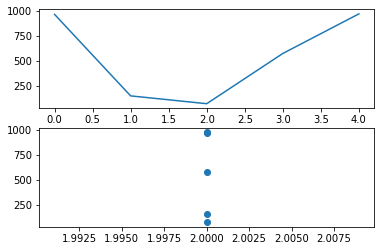

In [7]:
# Quick Plotting
plt.subplot(211)
plt.plot("Births", data=df_baby)
plt.subplot(212)
plt.scatter(x=np.repeat(2, df_baby["Births"].size), y="Births", data=df_baby)
plt.show()

### 2.2 Column Apply, Grouping, and Removing Anomalies

In [8]:
# set seed
np.random.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range. pd.date_range(start=, end=, freq="W-MON") is very useful.
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.random.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.random.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.random.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        # Extend is the list version for append.
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

#Generating the dataframe
dataSet = CreateDataSet(836)
df = pd.DataFrame(data=dataSet, columns=['State', 'Status', 'CustomerCount', 'StatusDate'])

## We can set status date as the index column. The set_index function doesn't mutate the original
## object.
df_raw = df
df = df_raw.set_index("StatusDate")

__apply__ function can be called from a DataFrame, or from its columns accessed through _DataFrame.COLNAME_

In [9]:
## Clean the data a bit.
# Convert fl to FL

df["State"] = df.State.apply(lambda x: x.upper())

In [10]:
## Checking whether the modification works
df["State"].unique()
df_raw["State"].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [11]:
## Merge NJ to NY
mask = df["State"] == "NJ"
df["State"][mask] = "NY"
df["State"].unique()

C:\Users\nleea\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['GA', 'FL', 'TX', 'NY'], dtype=object)

Let's see if the current dataset tells us anything.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

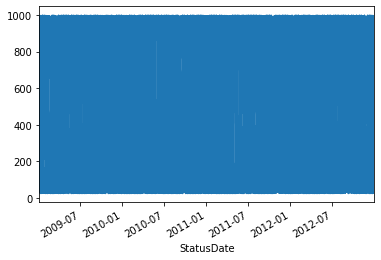

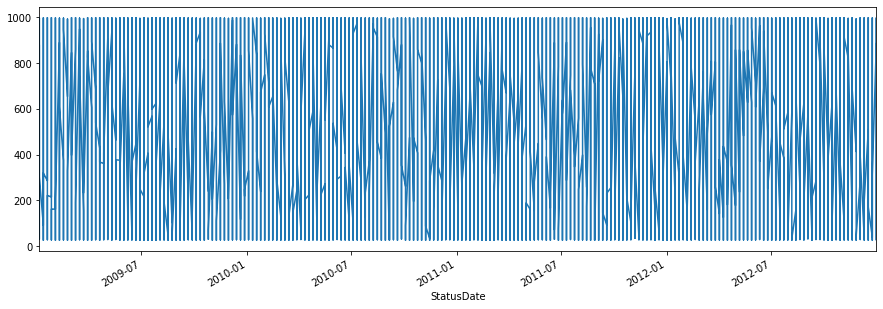

In [12]:
# Use two figures to set figsize.
# Simply calling plot generates a useless graph.
plt.figure(1)
df["CustomerCount"].plot()
plt.figure(2)
# Adjust the figure size. Notice how the index is automatically on the x-axis.
df["CustomerCount"].plot(figsize = (15,5))

Still not very informative. This suggests we need to do some data cleaning.

In [13]:
## Dimension Reduction: look at only states.
df.groupby(["State"])

### 2.X a brief diversion to groupby function

It's best to understand groupby as indexing through a column's values.

Used for aggregating data.

- DataFrame.groupby(key=) returns a GroupBy object.
- agg[]

In [14]:
df_nba = pd.read_csv("nba.csv")

In [15]:
# Shuffling dataframe
# Sorting dataframe. Use df.sort_values([...]) to sort by key pair; use df.sort_index() to sort values.
df_nba_unordered = df_nba.sample(frac=1)
df_nba_unordered.head(5)
# Recover from sort_index
df_nba_unordered.sort_index().head(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
253,K.J. McDaniels,Houston Rockets,32.0,SG,23.0,6-6,205.0,Clemson,3189794.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
330,Al Jefferson,Charlotte Hornets,25.0,C,31.0,6-10,289.0,NaN,13500000.0
434,Chris Kaman,Portland Trail Blazers,35.0,C,34.0,7-0,265.0,Central Michigan,5016000.0
284,James Ennis,New Orleans Pelicans,4.0,SF,25.0,6-7,210.0,Long Beach State,845059.0


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [16]:
## Different ways to create GroupBy Object.
grouped_nba_1 = df_nba.groupby("Team")
## Then aggregate using universal functions, which are functions with broadcasting
## built-in.
grouped_nba_1.agg(np.sum).head(5)
## You can define a universal funciton from numpy's universal functions.
def normalize(x):
    return (np.sum(x) - np.mean(x))/np.std(x)

g = grouped_nba_1.agg(normalize).head(5)
## Grouping by along columns. _QUITE CONFUSING ATM._


# Notice groupby().agg[] creates a DataFrame.
type(g)

,Number,Age,Weight,Salary
Team,,,,
Atlanta Hawks,285.0,423.0,3319.0,72902950.0
Boston Celtics,478.0,371.0,3292.0,58541068.0
Brooklyn Nets,274.0,384.0,3234.0,52528475.0
Charlotte Hornets,257.0,392.0,3306.0,78340920.0
Chicago Bulls,288.0,411.0,3284.0,86783378.0


pandas.core.frame.DataFrame

## 3. Graphing Grouped Datasets

In [35]:
# We're back to the generated customer count dataset.
df.head()
df_byState = df.drop("Status", axis=1).groupby(['State', 'StatusDate']).agg([np.sum])
df_byState


,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,FL,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


CustomerCount
                           sum
State StatusDate              
FL    2009-01-05        139388
      2009-01-12        128365
      2009-01-19        151385
      2009-01-26        149125
      2009-02-02        148196
...                        ...
TX    2012-12-03         61784
      2012-12-10         80609
      2012-12-17         73740
      2012-12-24         74829
      2012-12-31         82672

[836 rows x 1 columns]

In [36]:
# When indices are tuples, DataFrame.index.levels returns a list of factors 
df_byState.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

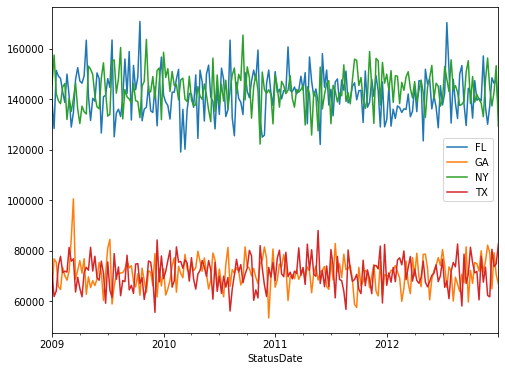

In [70]:
# Plotting all grouped data on one graph.
states = df_byState.index.levels[0]
fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(states)):
    df_byState.loc[states[i]].sort_index().plot(legend=states[i], ax=ax)
plt.legend(states)

<Figure size 432x288 with 0 Axes>

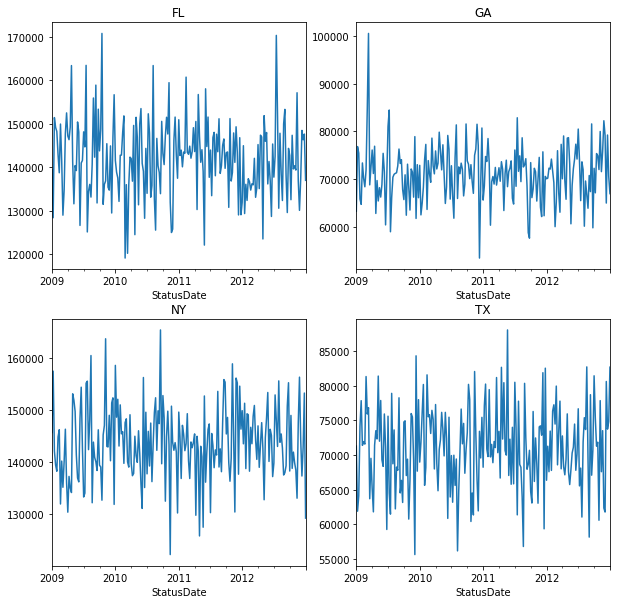

In [82]:
## Plotting one graph for each data.
fig2 = plt.figure(2)
fig2,ax2 = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i in range(len(states)):
    df_byState.loc[states[i]].sort_index().plot(legend=None, ax=ax2[i//2, i%2], title=states[i])

In [73]:
plt.subplots?